In [22]:
#了解数据
#先把数据掉出来看看长什么样，tips注意几行几列（也就是维数），注意数据类型（数值，类别等）,数据蕴含的信息


import numpy as np # linear algebra
import pandas as pd # data processing

train_df=pd.read_csv('train.csv',index_col=0)
test_df=pd.read_csv('test.csv',index_col=0)

train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 数据预处理（两个集都要的不要只处理train）

# 先对要预测的y操作一番

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price+1)'}>]], dtype=object)

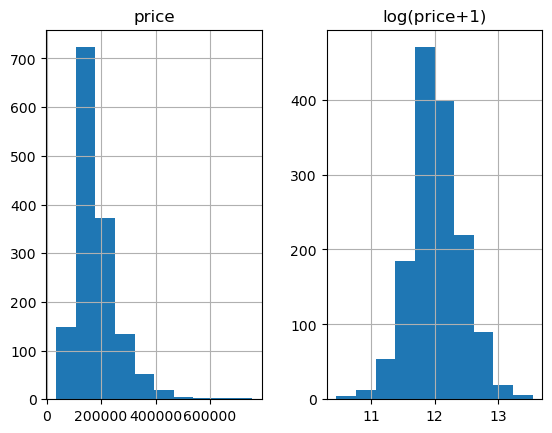

In [23]:
%matplotlib inline
prices=pd.DataFrame({'price':train_df['SalePrice'],'log(price+1)':np.log1p(train_df["SalePrice"])})
prices.hist()
#上面是检验平滑化,不是实际操作

In [24]:
y_train=np.log1p(train_df.pop('SalePrice'))
y_train.head()
#这里是发现可以平滑正态了于是开始操作一番y

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

# 对x操作一番 其实就是特征工程 
 首先要先弄好范围

特征工程（Feature Engineering）是将原始数据转换为更能代表潜在问题的特征的过程，以便于机器学习算法更好地理解和使用这些数据。
特征工程包括以下几个主要步骤和方法：

1.数据清洗:
处理缺失值: 缺失值可以通过删除、填充（例如，使用平均值、中位数或最常见值填充）或插值方法来处理。
处理异常值: 异常值可以通过统计方法（如箱线图）检测，并根据具体情况进行处理（如删除或替换）。

2.特征选择:
移除低方差特征: 删除那些在数据集中几乎没有变化的特征。
相关性分析: 使用相关矩阵或其他统计方法，选择与目标变量相关性高的特征。
嵌入式方法: 利用模型（如决策树）本身的特征选择功能来选择重要特征。

3.特征提取与创建:
聚合特征: 通过聚合（如求和、平均、最大值、最小值等）创建新的特征。
多项式特征: 通过特征的多项式组合（如平方、立方等）创建新的特征。
时间特征: 从时间数据中提取有用的信息（如小时、星期几、月份等）。
文本处理: 对文本数据进行处理，如分词、词袋模型、TF-IDF 等方法来创建新的特征。

4.特征编码:
标签编码: 将分类数据转换为整数编码。
One-Hot 编码: 将分类数据转换为二进制向量。
频率编码: 使用各类别的频率或计数作为新特征。

5.特征缩放:
标准化: 使特征具有零均值和单位方差
归一化: 将特征缩放到一个固定范围（如 0 到 1）

In [25]:
all_df = pd.concat(objs=[train_df, test_df], axis=0)
#合并训练集与测试集

# 特征工程 变量转化

In [26]:
all_df['MSSubClass'].dtypes

dtype('int64')

In [27]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

# 哑变量变换

In [28]:
pd.get_dummies(all_df['MSSubClass'],prefix='MSSubClass').head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [29]:
all_dummy_df=pd.get_dummies(all_df)
all_dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


# 缺失值处理（均值填充）

In [30]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF1        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
GarageCars        1
dtype: int64

In [31]:
mean_cols=all_dummy_df.mean()
mean_cols.head(10)

MSSubClass         57.137718
LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
dtype: float64

In [32]:
all_dummy_df=all_dummy_df.fillna(mean_cols)
all_dummy_df['LotFrontage'].isnull()#求的all_df中单列的缺失值数量

Id
1       False
2       False
3       False
4       False
5       False
        ...  
2915    False
2916    False
2917    False
2918    False
2919    False
Name: LotFrontage, Length: 2919, dtype: bool

In [33]:
all_dummy_df.isnull().sum().sum()#求的all_df的缺失值数量

0

# 了解数据类型

In [34]:
numeric_cols=all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

标准化（Standardization）和归一化（Normalization）是两种不同的数据预处理技术

标准化是将数据转换为均值为0，标准差为1的分布。具体方法是将每个数据点减去均值，然后除以标准差。这种方法适用于数据具有高斯（正态）分布的情况。

公式：
[ Z = \frac{X - \mu}{\sigma} ]

其中：

( X ) 是原始数据
( \mean ) 是数据的均值
( \sigma ) 是数据的标准差
( Z ) 是标准化后的数据点

归一化（Normalization）

归一化通常是将数据缩放到一个特定的范围（例如0到1）。这在数据的范围差异较大的时候特别有用，可以避免某些算法（如使用距离度量的算法）受到数值范围的影响。

常见的归一化方法是最小-最大缩放（Min-Max Scaling），将数据缩放到[0, 1]范围内：

公式：
[ X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}} ]

其中：

( X ) 是原始数据
( X_{\min} ) 是数据的最小值
( X_{\max} ) 是数据的最大值
( X' ) 是归一化后的数据点
比较和应用场景

标准化:
适用于数据呈正态分布，或希望数据具有均值为0、标准差为1的特性。
常用于线性回归、逻辑回归、支持向量机等需要假设数据呈正态分布的算法。

归一化:
适用于数据没有明确的分布，或希望将数据缩放到一个特定的范围（如0到1）。
常用于K近邻算法、神经网络等对数据范围敏感的算法

# 标准化数据

In [35]:
#numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
#numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
#all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

# 建立模型

In [36]:
#将数据集all分开回训练集和测试集
#建模原理：从训练集提取特征并放到测试集中预测
dummy_train_df=all_dummy_df.loc[train_df.index]
dummy_test_df=all_dummy_df.loc[test_df.index]

In [37]:
dummy_train_df.shape#数据检查

(1460, 288)

In [38]:
#下面是找参数的过程

In [39]:
#ridge regression模型
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [40]:
#将数据从dataframe转化为numpy下的array数组
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [ ]:
pip install --upgrade scikit-learn scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 49.6 kB/s eta 0:00:0000:0100:05
     ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/39.4 MB 13.2 kB/s eta 0:46:29

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 2, 50)
clf = RidgeCV(alphas=alphas, store_cv_values=True)
clf.fit(X_train, y_train)
test_score = np.sqrt(np.mean(clf.cv_values_, axis=0))

Text(0.5, 1.0, 'Alpha vs CV Error')

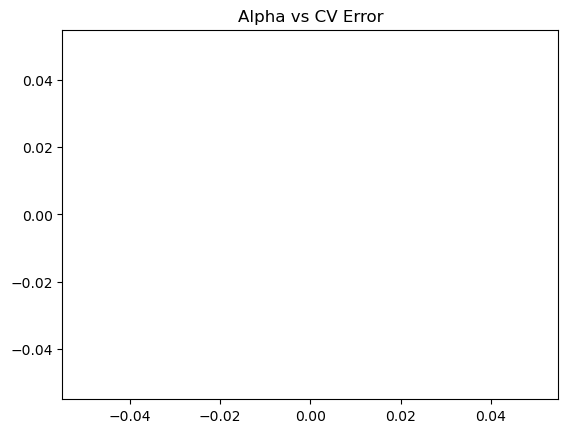

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error")

In [ ]:
#随机森林模型
from sklearn.ensemble import RandomForestRegressor

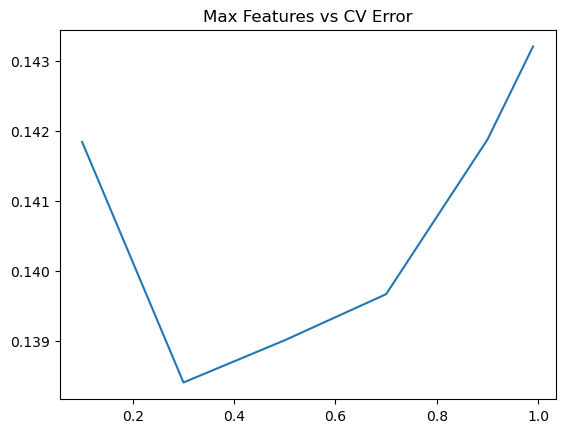

In [67]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

# 模型ensemble

In [68]:
ridge = Ridge(alpha=15)
rf = RandomForestRegressor(n_estimators=500, max_features=.3)

In [71]:
#ridge.fit(X_train, y_train)#fit是训练，用训练集
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.3, n_estimators=500)

In [72]:
#数据转换回去
y_ridge = np.expm1(ridge.predict(X_test))#predict是训练好可以用了
y_rf = np.expm1(rf.predict(X_test))

AttributeError: 'Ridge' object has no attribute 'coef_'

In [48]:
#取平均，最简单的ensemble
y_final = (y_ridge + y_rf) / 2

In [49]:
#结果生成展示如下
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_final})

In [50]:
submission_df.head(10)

,Id,SalePrice
0,1461,119611.891891
1,1462,151777.069440
2,1463,174406.777029
3,1464,190594.515161
4,1465,195047.361052
5,1466,176289.928899
6,1467,177314.164788
7,1468,169370.039401
8,1469,183657.452547
9,1470,122335.667726
